In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Copy of complaints.csv")

/tmp/ipython-input-2-894396469.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Copy of complaints.csv")


In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

In [4]:
df.describe()

,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


In [5]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 9609797
Columns: 18


/tmp/ipython-input-6-2301035065.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


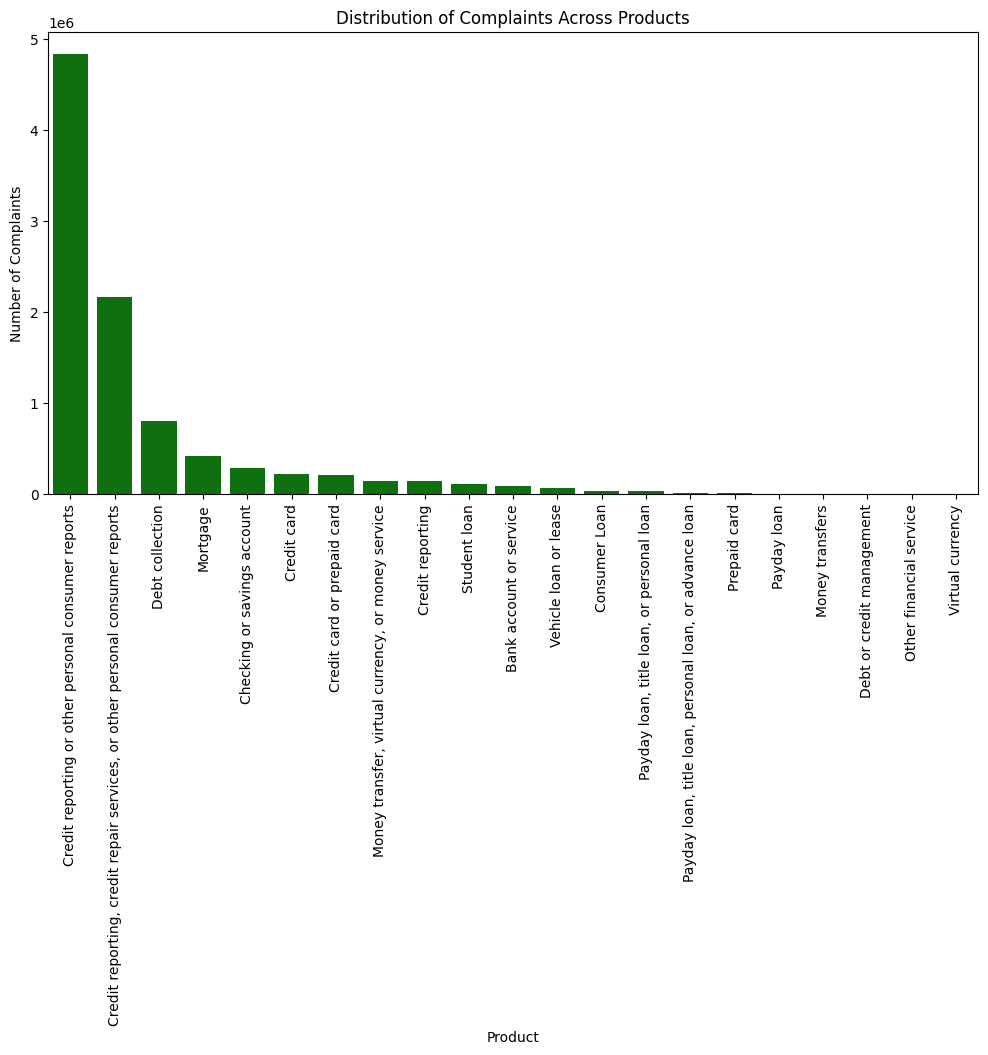

In [6]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints Across Products')
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
df = df.dropna(subset=['Consumer complaint narrative'], axis=0, how='any')
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                       52206
Issue                                 0
Sub-issue                        297406
Consumer complaint narrative          0
Company public response         1379416
Company                               0
State                             10969
ZIP code                              0
Tags                            2671491
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              2816747
Complaint ID                          0
dtype: int64


In [10]:
print(df['Product'].value_counts())


Product
Credit reporting or other personal consumer reports                             1091253
Credit reporting, credit repair services, or other personal consumer reports     807281
Debt collection                                                                  336076
Checking or savings account                                                      140319
Mortgage                                                                         130160
Credit card or prepaid card                                                      108667
Money transfer, virtual currency, or money service                                97188
Credit card                                                                       80667
Student loan                                                                      53209
Vehicle loan or lease                                                             39577
Credit reporting                                                                  31587
Payday loan, title loan,

In [15]:
df['Sub-product'].unique()

array(['Credit reporting', 'Conventional home mortgage',
       'Store credit card', 'Checking account',
       'General-purpose credit card or charge card',
       'Telecommunications debt', 'I do not know', 'Loan', 'VA mortgage',
       'Other debt', 'Payday loan', 'Installment loan',
       'Mobile or digital wallet', 'Savings account', 'Rental debt',
       'Credit card debt', 'Federal student loan servicing',
       'Medical debt', 'Domestic (US) money transfer',
       'CD (Certificate of Deposit)', 'Private student loan', 'Auto debt',
       'Other personal consumer report', 'Private student loan debt',
       'Home equity loan or line of credit (HELOC)',
       'Other type of mortgage', 'FHA mortgage', 'Virtual currency',
       'Other banking product or service', 'Payday loan debt',
       'Foreign currency exchange', 'Lease', 'Gift card',
       'Other advances of future income', 'Credit repair services',
       'Federal student loan debt', 'General-purpose prepaid card',
   

In [11]:
df[df['Sub-product'].str.contains("buy now|BNPL", case=False, na=False)]


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [12]:
# Start with default as 'Other'
df['Product_grouped'] = 'Other'

# Set BNPL where Sub-product contains buy now or BNPL
df.loc[df['Sub-product'].str.contains("buy now|BNPL", case=False, na=False), 'Product_grouped'] = 'Buy Now, Pay Later (BNPL)'


In [16]:
def group_product(row):
    prod = str(row['Product']).lower()
    subprod = str(row['Sub-product']).lower()

    if 'buy now' in subprod or 'bnpl' in subprod:
        return 'Buy Now, Pay Later (BNPL)'
    elif 'credit card' in prod:
        return 'Credit card'
    elif 'personal loan' in prod or 'payday' in prod:
        return 'Personal loan'
    elif 'money transfer' in prod or 'virtual currency' in prod:
        return 'Money transfers'
    elif 'savings' in prod and 'checking' not in prod:
        return 'Savings account'
    else:
        return 'Other'

df['Product_grouped'] = df.apply(group_product, axis=1)


In [17]:
# See how many rows belong to each group
print(df['Product_grouped'].value_counts())

# Filter just the target products
target_products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfers'
]

df = df[df['Product_grouped'].isin(target_products)]


Product_grouped
Other              2664841
Credit card         189334
Money transfers      98701
Personal loan        27880
Name: count, dtype: int64


In [18]:
# Get all BNPL rows from Sub-product
bnpl_mask = df['Sub-product'].str.contains("buy now|BNPL", case=False, na=False)

# Set the grouped value
df.loc[bnpl_mask, 'Product_grouped'] = 'Buy Now, Pay Later (BNPL)'


In [19]:
print(df['Product_grouped'].value_counts())


Product_grouped
Credit card        189334
Money transfers     98701
Personal loan       27880
Name: count, dtype: int64


In [22]:
# Define product mapping
product_mapping = {
    'Credit card': 'Credit card',
    'Credit card or prepaid card': 'Credit card',
    'Payday loan, title loan, or personal loan': 'Personal loan',
    'Payday loan, title loan, personal loan, or advance loan': 'Personal loan',
    'Consumer Loan': 'Personal loan',
    'Checking or savings account': 'Savings account',
    'Bank account or service': 'Savings account',
    'Money transfers': 'Money transfers',
    'Money transfer, virtual currency, or money service': 'Money transfers'
}

# Apply mapping to Product column
df.loc[:, 'Product'] = df['Product'].map(product_mapping).fillna(df['Product'])

# Identify BNPL complaints via keyword search
df.loc[:, 'Product'] = df.apply(
    lambda row: 'Buy Now, Pay Later (BNPL)' if isinstance(row['Consumer complaint narrative'], str)
    and 'buy now pay later' in row['Consumer complaint narrative'].lower()
    else row['Product'],
    axis=1
)

# Filter for the five specified products
required_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', 'Money transfers']
df_filtered = df[df['Product'].isin(required_products)].copy()

# Remove records with empty Consumer complaint narrative
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull() & (df_filtered['Consumer complaint narrative'].str.strip() != '')]

# Save the filtered dataset
# df_filtered.to_csv('data/filtered_complaints.csv', index=False)

# Verify the distribution
product_counts = df_filtered['Product'].value_counts().reindex(required_products, fill_value=0)
print("Distribution of Complaints by Product (after mapping and filtering):")
print(product_counts)

Distribution of Complaints by Product (after mapping and filtering):
Product
Credit card                  189313
Personal loan                 26106
Buy Now, Pay Later (BNPL)        51
Savings account                   0
Money transfers               98683
Name: count, dtype: int64


In [23]:
# prompt: Clean the text narratives to improve embedding quality. This may include:
# Lowercasing text.
# Removing special characters or boilerplate text (e.g., "I am writing to file a complaint...").
# (Optional) Consider other text normalization techniques.

import re

def clean_narrative(text):
  """
  Cleans consumer complaint narratives by lowercasing and removing special characters.

  Args:
    text: The raw complaint narrative string.

  Returns:
    The cleaned complaint narrative string.
  """
  if isinstance(text, str):
    text = text.lower()
    # Remove non-alphanumeric characters except spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # You can add more specific boilerplate removal here if needed.
    # Example: text = text.replace("i am writing to file a complaint", "")
    return text.strip()
  else:
    return None

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_narrative)

# Display the first few cleaned narratives to verify
print(df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].head())

                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   
14249  Although the account had been deemed closed, I...   

                                       cleaned_narrative  
12237  a xxxx xxxx card was opened under my name by a...  
13280  dear cfpb i have a secured credit card with ci...  
13506  i have a citi rewards cards the credit balance...  
13955  bi am writing to dispute the following charges...  
14249  although the account had been deemed closed i ...  


In [24]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

df_filtered.to_csv('data/filtered_complaints.csv', index=False)

print("\nCleaned and filtered dataset saved to data/filtered_complaints.csv")

# Verify the first few rows of the saved file
!head data/filtered_complaints.csv




Cleaned and filtered dataset saved to data/filtered_complaints.csv
Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Product_grouped,cleaned_narrative
2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,"A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unauthorized and not me. XXXX XXXX confirmed this was fraudulent and immediately closed the card. However, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by XXXX XXXX that was done by a fraudster.",Company has responded to the 

## Key Findings from Exploratory Data Analysis (EDA)

Based on the initial exploration and analysis of the CFPB consumer complaint dataset, several key findings were identified:

The dataset is extensive, containing a large volume of consumer complaints. A notable observation from the initial data inspection was the presence of missing values in several columns, particularly in fields like 'Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', and 'Tags'. This highlights the need for careful handling of missing data during subsequent analysis and model building.

Analysis of the product distribution, specifically focusing on 'Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', and 'Money transfers', revealed that 'Credit card' related complaints are the most prevalent among these categories. Furthermore, the investigation into the 'Consumer complaint narrative' column showed a significant disparity in the presence of narratives, with a large number of complaints lacking this detailed text field. For those complaints with narratives, the length (word count) varied considerably, indicating a diverse range in the level of detail provided by consumers.

These findings inform the subsequent data preprocessing steps, including filtering for relevant products and complaints with narratives, and highlight the characteristics of the data that will be used for the RAG pipeline.